<a href="https://colab.research.google.com/github/ankramirez/ankramirez/blob/main/pima_indians_diabetes_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundations of Data Science Project - Diabetes Analysis

---------------
## Context
---------------

Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients are growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes.

A few years ago research was done on a tribe in America which is called the Pima tribe (also known as the Pima Indians). In this tribe, it was found that the ladies are prone to diabetes very early. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients were females at least 21 years old of Pima Indian heritage. 

-----------------
## Objective
-----------------

Here, we are analyzing different aspects of Diabetes in the Pima Indians tribe by doing Exploratory Data Analysis.

-------------------------
## Data Dictionary
-------------------------

The dataset has the following information:

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: A function that scores the likelihood of diabetes based on family history.
* Age: Age in years
* Outcome: Class variable (0: a person is not diabetic or 1: a person is diabetic)

## Importing the necessary libraries and briefly explain the use of each library

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Numpy**: It is a fundamental package wich allows us to work with arrays, these arrays facilitate advance mathematical and other types of operations on large number data, numerical analysis can also be performed.

**Pandas**: Is a Software Library, allows us to analyse data and manipulate it easily using DataFrames and Series, it's the main tool used to read and write data in various formats.

**Seaborn**: Is a data visualization library based on matplotlib for Exploratory Analysis, the API is considerably more friendly than Matplotlib and provides attractive and informative statistical graphics.

**Matplotlib**: It is a data visualization library, which initially tried emulating MATLAB. Uses NummPy in order to manage large arrays.

## Reading the given dataset

In [2]:
pima = pd.read_csv("diabetes.csv")

## Showing the last 10 records of the dataset. How many columns are there?

In [3]:
pima.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,20,79,37.5,0.197,26,0
759,6,190,92,20,79,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,79,44.0,0.403,43,1
762,9,89,62,20,79,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,79,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,20,79,30.1,0.349,47,1
767,1,93,70,31,79,30.4,0.315,23,0


There is a total number of 9 columns in the data (index column is not taken into account since it is assigned when the data is loaded and converted into a data frame).

## Showing the first 10 records of the dataset

In [4]:
pima.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79,33.600000,0.627,50,1
1,1,85,66,29,79,26.600000,0.351,31,0
2,8,183,64,20,79,23.300000,0.672,32,1
3,1,89,66,23,94,28.100000,0.167,21,0
4,0,137,40,35,168,43.100000,2.288,33,1
5,5,116,74,20,79,25.600000,0.201,30,0
6,3,78,50,32,88,31.000000,0.248,26,1
7,10,115,69,20,79,35.300000,0.134,29,0
8,2,197,70,45,543,30.500000,0.158,53,1
9,8,125,96,20,79,31.992578,0.232,54,1


## Dimensions of the `pima` dataframe

In [5]:
pima.shape

(768, 9)

The dimension of the dataset is obtained by calling the method of the dataframe 'shape' and the result is given in a tuple, in which the first element indicates the number of rows present in the dataset, and the second element indicates the number of columns present in the dataset.


## Size of the `pima` dataframe

In [6]:
pima.size

6912

The size of the dataset is obtained by calling the method 'size' of the dataframe, and the result is a scalar, a numpy integer, given by the product of the number of rows by the number of columns, which is the total number of elements.


## Data types of all the variables in the data set

In [7]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The variables types are:

int64 in the case of Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, Age and Outcome. 

float64 in the case of BMI and DiabetesPedigreeFunction.

int64 represent an integer of 64 bits, while float64 can store digits after decimal points, up to 15 to 17. Despite Outcome being stored as an integer variable, it's actual value it's either yes or no, which would have been better represented with a boolean variable.                                                                    

## Missing values in the `pima` dataframe

In [8]:
pima.isnull().values.any()

False

A missing value is when a given variable doesn't possess a value in an specific position, and it's indicated by the symbol NaN (Not a value).

## Summary statistics for all variables except 'Outcome' in the `pima` data.

In [9]:
pima.iloc[:,0:8].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.675781,72.250000,26.447917,118.270833,32.450805,0.471876,33.240885
std,3.369578,30.436252,12.117203,9.733872,93.243829,6.875374,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,20.000000,79.000000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,79.000000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [10]:
pima.BMI.describe()

count    768.000000
mean      32.450805
std        6.875374
min       18.200000
25%       27.500000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

## Plot the distribution plot for the variable 'BloodPressure'. Write detailed observations from the plot.

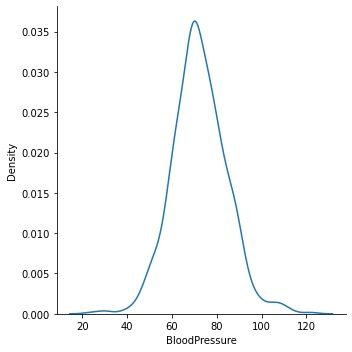

In [11]:
sns.displot(pima['BloodPressure'], kind='kde')
plt.show()

- The distribution seems to be normal because it shows some kind of symmetry around the mean (around 72, and minimum value around 40 and max value around 100).
- The small widthness implies a small standard deviation. 
- There seem to be some extreme values, specially to the right.

## What is the 'BMI' of the person having the highest 'Glucose'?

In [12]:
pima[pima['Glucose']==pima['Glucose'].max()]['BMI']

661    42.9
Name: BMI, dtype: float64


### What is the mean of the variable 'BMI'? 
### What is the median of the variable 'BMI'? 
### What is the mode of the variable 'BMI'?
### Are the three measures of central tendency equal?

In [13]:
m1 = pima['BMI'].mean()  # mean
print(m1)
m2 = pima['BMI'].median()  # median
print(m2)
m3 = pima['BMI'].mode()[0]  # mode
print(m3)

equal = lambda x, y, z: print('All three measures of central tendency are equal') if x==y==z else print('Not all the three measures of central tendency are equal')
equal(m1,m2,m3)

32.45080515543619
32.0
32.0
Not all the three measures of central tendency are equal


The values of median and mode are equal, while the the value of the mean is different, however, not for much.

This supports the previous statement about the distribution being somehow normal-distributed.

## How many women's 'Glucose' levels are above the mean level of 'Glucose'? 

In [14]:
pima[pima['Glucose']>pima['Glucose'].mean()].shape[0]

343

There are 343 women with 'Glucose' level (at the time of examination) higher than the mean (at the time of examination).


## How many women have their 'BloodPressure' equal to the median of 'BloodPressure' and their 'BMI' less than the median of 'BMI'?

In [15]:
pima[(pima['BloodPressure']==pima['BloodPressure'].median()) & (pima['BMI']<pima['BMI'].median())].shape[0]

22

There are 22 women in total who, at the time of the examination, had a 'BloodPressure' equal to the median of 'BloodPressure' and at the same time had a 'BMI' less than the median value of 'BMI'. (Median values calculated for all 768 women who went through the test.)


## Pairplots for the variables 'Glucose', 'SkinThickness', and 'DiabetesPedigreeFunction'

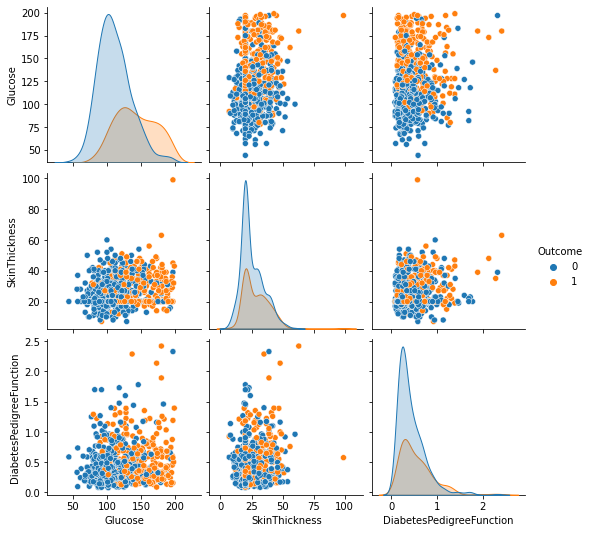

In [16]:
sns.pairplot(data=pima,vars=['Glucose', 'SkinThickness', 'DiabetesPedigreeFunction'], hue='Outcome')
plt.show()

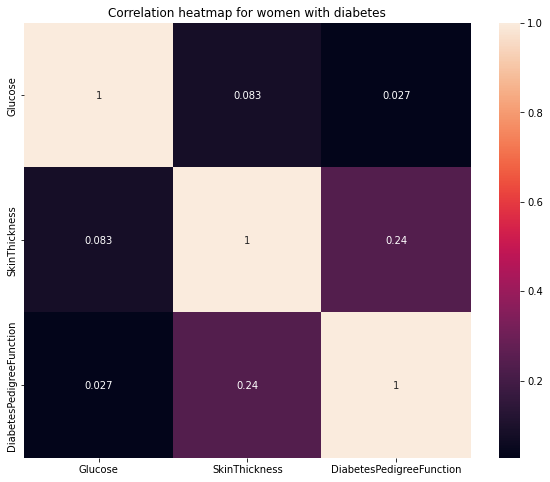

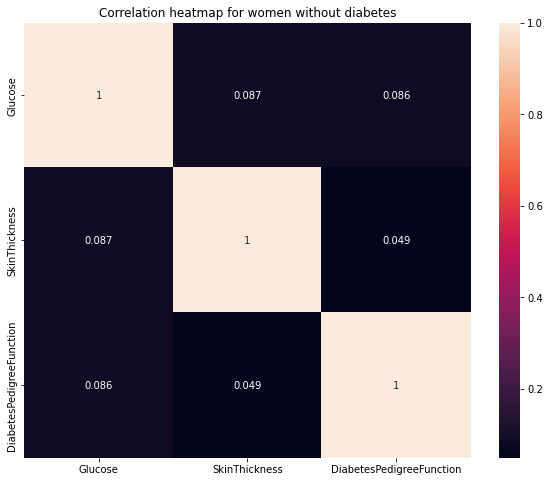

In [17]:
#Creating a new DF with different outcomes, Yes = 1, No = 0
pimayes = pima[pima['Outcome']==1]
pimano = pima[pima['Outcome']==0]

#Creating a correlation matrix for each DF, using the selected variables
corryes = pimayes[['Glucose', 'SkinThickness', 'DiabetesPedigreeFunction']].corr()
corrno = pimano[['Glucose', 'SkinThickness', 'DiabetesPedigreeFunction']].corr()

#Displaying the heatmap for each correlation matrix
plt.figure(figsize=(10,8))
plt.title('Correlation heatmap for women with diabetes')
sns.heatmap(corryes, annot = True)
plt.show()
plt.figure(figsize=(10,8))
plt.title('Correlation heatmap for women without diabetes')
sns.heatmap(corrno, annot = True)
plt.show()


## Plotting the scatterplot between 'Glucose' and 'Insulin'

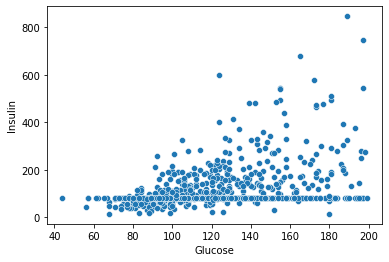

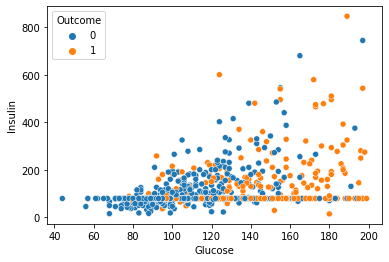

In [18]:
sns.scatterplot(x='Glucose',y='Insulin',data=pima)
plt.show()
sns.scatterplot(x='Glucose',y='Insulin',data=pima, hue='Outcome')
plt.show()

- From the graph it can be seen that there seems to be some correlation between the 'Glucose' value and the 'Insulin'.
- There seems to be a lot of women with a constant value of Insulin. \
<br>**To better analyse the data, a new graph using a hue according to the diabetes outcome was made**:
- The correlation between the 'Glucose' value and the 'Insulin' seems to hold either for women with diabetes, as well as for the women without diabetes.
- The constant value of Insulin is present for both outcomes.


## Plotting the boxplot for the 'Age' variable, finding outliers

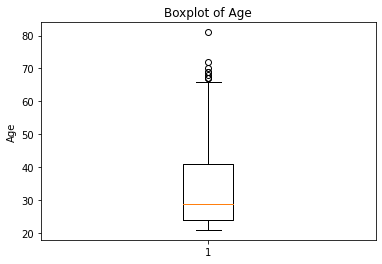

In [19]:
plt.boxplot(pima['Age'])

plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

There are outliers, mainly for older ages, around 67 years and older. It can be observed from the blank-filled dots outside the inter quartile range indicated by straight lines. 


## Plotting histograms for the 'Age' variable to understand the number of women in different age groups given whether they have diabetes or not

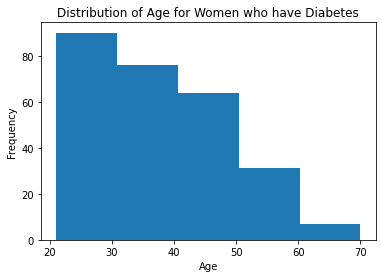

In [20]:
plt.hist(pima[pima['Outcome']==1]['Age'], bins = 5)
plt.title('Distribution of Age for Women who have Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

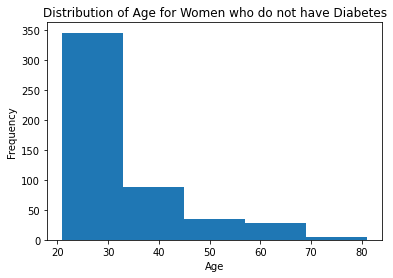

In [21]:
plt.hist(pima[pima['Outcome']==0]['Age'], bins = 5)
plt.title('Distribution of Age for Women who do not have Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

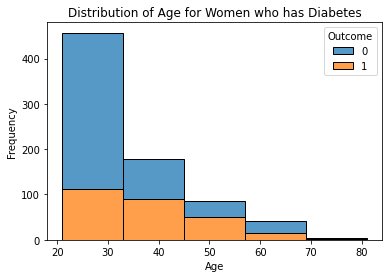

In [22]:
sns.histplot(data=pima, x='Age', hue='Outcome', bins = 5, multiple="stack")
plt.title('Distribution of Age for Women who has Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [23]:
print(pima[pima['Outcome']==0]['Age'].median())
print(pima[pima['Outcome']==1]['Age'].median())
print(pima[pima['Outcome']==0]['Age'].mean())
print(pima[pima['Outcome']==1]['Age'].mean())

27.0
36.0
31.19
37.06716417910448


- The age distribution for women without diabetes is clearly skewed to the left, with a mean surely between 21 and 32 years, other central tendencies measurements as median and mode will most likely have a value somewhere between the interval values' of the first bin.
- The age distribution for women with diabetes is skewed to the left as well, the central values are probably around the first bin, and they should be closer than those corresponding to the women without diabetes, since the distribution is more smoothly distributed, it's not so clear where the mode can be found, but could be around the first bin.
<br>
- When comparing both histograms, it can be seen that there are way many more women who don't have diabetes around the age comprised in the first bin, and therefore the distribution is clearly more skewed than that of the women who have diabetes.









## Interquartile Range of all the variables

In [24]:
Q1 = pima.quantile(0.25)
Q3 = pima.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                  5.0000
Glucose                     40.5000
BloodPressure               16.0000
SkinThickness               12.0000
Insulin                     48.2500
BMI                          9.1000
DiabetesPedigreeFunction     0.3825
Age                         17.0000
Outcome                      1.0000
dtype: float64


The IQ range indicates the value of the range where 50% of the data is distributed, can also be used to determine a range outside of which, the values are taken as outliers.\
Using separately the range between Q1 and Q2 (median) and between Q2 and Q3, the skewness of the distribution can be determined.

## Correlation matrix

In [25]:
corr_matrix = pima.iloc[:,0:8].corr()

corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.128022,0.208987,0.009393,-0.018780,0.021546,-0.033523,0.544341
Glucose,0.128022,1.000000,0.219765,0.158060,0.396137,0.231464,0.137158,0.266673
BloodPressure,0.208987,0.219765,1.000000,0.130403,0.010492,0.281222,0.000471,0.326791
SkinThickness,0.009393,0.158060,0.130403,1.000000,0.245410,0.532552,0.157196,0.020582
Insulin,-0.018780,0.396137,0.010492,0.245410,1.000000,0.189919,0.158243,0.037676
BMI,0.021546,0.231464,0.281222,0.532552,0.189919,1.000000,0.153508,0.025748
DiabetesPedigreeFunction,-0.033523,0.137158,0.000471,0.157196,0.158243,0.153508,1.000000,0.033561
Age,0.544341,0.266673,0.326791,0.020582,0.037676,0.025748,0.033561,1.000000


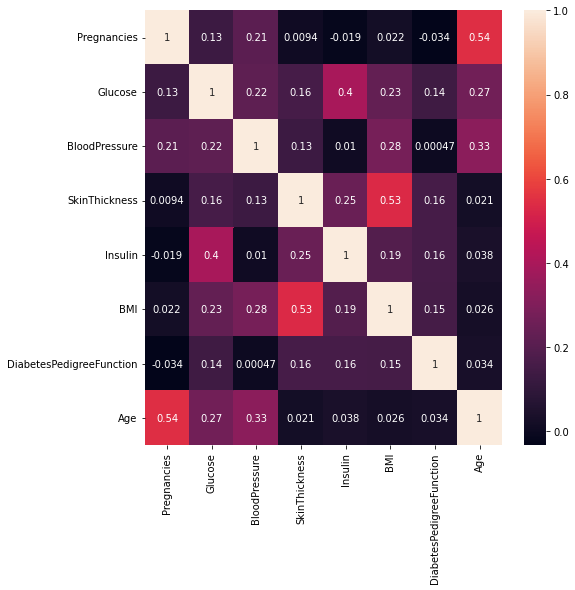

In [26]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot = True)

# display the plot
plt.show()

- Overall, there doesn't seem to be a high correlation between any two variables.
- The highest correlations seems to be between BMI and skin thickness, and age and pregnancies.
- In the case of age and pregnancies seems reasonably to find a positive correlation, since the older the woman is, the more children that could have bared.
- The variables Pregnancies and Insulin, have a negative correlation, but since it's value is so small, their relation can be disregarded, as well as in the case of Pregnancies and DiabetesPedigreeFunction.
